<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/Python-Notebook-Banners/Examples.png"  style="display: block; margin-left: auto; margin-right: auto;";/>
</div>

# Introduction

The followig aims to get you up and running with the predict.
Make a copy of the notebook and run all cells. We will also show you how to get your submission file from kaggle.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Installing packages
Please download all relevant packages in. There is no terminal so you will pip install everything.

You can find a list of recommended install from the Intro to Recommender sysytem notebook.

In [1]:
pip install scikit-surprise


  Using cached scikit_surprise-1.1.4.tar.gz (154 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp312-cp312-win_amd64.whl size=1290938 sha256=0e9fffa5940cc292348b6a053ebea40e8050293703f42623fc193a3c62625615
  Stored in directory: c:\users\chris\appdata\local\pip\cache\wheels\75\fa\bc\739bc2cb1fbaab6061854e6cfbb81a0ae52c92a502a7fa454b
Successfully built scikit-surprise
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Install packages here
# Packages for data processing
import numpy as np
import pandas as pd
import datetime
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re
from scipy.sparse import csr_matrix
import scipy as sp


# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Packages for modeling
from surprise import Reader
from surprise import Dataset
from surprise import KNNWithMeans
from surprise import KNNBasic
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV
from surprise import SVD
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
import heapq

# Packages for model evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from time import time

# Package to suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Packages for saving models
import pickle


## Reading in data

In [7]:
train_df = pd.read_csv(r"C:\Users\chris\Downloads\UNSUPERVISED LEARNING\KAGGLE COMPETITION\alx-movie-recommendation-project-2024\train.csv")
movies_df = pd.read_csv(r"C:\Users\chris\Downloads\UNSUPERVISED LEARNING\KAGGLE COMPETITION\alx-movie-recommendation-project-2024\movies.csv")
imdb_df = pd.read_csv(r"C:\Users\chris\Downloads\UNSUPERVISED LEARNING\KAGGLE COMPETITION\alx-movie-recommendation-project-2024\imdb_data.csv")
test_df = pd.read_csv(r"C:\Users\chris\Downloads\UNSUPERVISED LEARNING\KAGGLE COMPETITION\alx-movie-recommendation-project-2024\test.csv")
links_df = pd.read_csv(r"C:\Users\chris\Downloads\UNSUPERVISED LEARNING\KAGGLE COMPETITION\alx-movie-recommendation-project-2024\links.csv")
tags_df = pd.read_csv(r"C:\Users\chris\Downloads\UNSUPERVISED LEARNING\KAGGLE COMPETITION\alx-movie-recommendation-project-2024\tags.csv")
genome_scores_df = pd.read_csv(r"C:\Users\chris\Downloads\UNSUPERVISED LEARNING\KAGGLE COMPETITION\alx-movie-recommendation-project-2024\genome_scores.csv")
genome_tags_df = pd.read_csv(r"C:\Users\chris\Downloads\UNSUPERVISED LEARNING\KAGGLE COMPETITION\alx-movie-recommendation-project-2024\genome_tags.csv")
sample_submissions_df = pd.read_csv(r"C:\Users\chris\Downloads\UNSUPERVISED LEARNING\KAGGLE COMPETITION\alx-movie-recommendation-project-2024\sample_submission.csv")

In [8]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [9]:
movies_df.shape

(62423, 3)

## EDA


### Outliers
- **Identify outliers**: Outliers are data points that differ significantly from other observations. They can skew and mislead the training process of a machine learning model.
- **Detecting outliers**: Use statistical methods such as Z-scores or IQR (Interquartile Range) to detect outliers.
- **Handling outliers**: Decide whether to remove or transform the outliers depending on their impact on the dataset.

### Understanding Relationships Between Various Attributes and Structure of the Data
- **Correlation Analysis**: Use correlation matrices to understand the relationships between numerical attributes.
- **Visualization Techniques**: Employ scatter plots, pair plots, and heatmaps to visualize and explore relationships.
- **Data Structure**: Understand the structure of the data, including the distribution of values and the presence of any missing values.

### Recognizing Important Variables
- **Feature Importance**: Use techniques like Random Forests, Gradient Boosting, or SHAP values to determine feature importance.
- **Domain Knowledge**: Incorporate domain expertise to identify which variables are likely to be important.
- **Statistical Tests**: Conduct statistical tests to identify variables that have significant effects on the target variable.

By understanding the data through these steps, we ensure a robust foundation for building and evaluating machine learning models.


**Lets Check whether or not we have any missing values in our dataset**

In [10]:
print("Train: ")
print(str(train_df.isnull().sum()))
print("************")
print("Test: ")
print(str(test_df.isnull().sum()))
print("************")
print("Movies: ")
print(str(movies_df.isnull().sum()))
print("************")
print("Links: ")
print(str(links_df.isnull().sum()))
print("************")
print("IMDB: ")
print(str(imdb_df.isnull().sum()))
print("************")
print("Genome scores: ")
print(str(genome_scores.isnull().sum()))
print("************")
print("Genome tags: ")
print(str(genome_tags.isnull().sum()))

Train: 
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
************
Test: 
userId     0
movieId    0
dtype: int64
************
Movies: 
movieId    0
title      0
genres     0
dtype: int64
************
Links: 
movieId      0
imdbId       0
tmdbId     107
dtype: int64
************
IMDB: 
movieId              0
title_cast       10068
director          9874
runtime          12089
budget           19372
plot_keywords    11078
dtype: int64
************
Genome scores: 


NameError: name 'genome_scores' is not defined

In [11]:
import pandas as pd

# Load data files
train_df = pd.read_csv(r'C:\Users\chris\Downloads\UNSUPERVISED LEARNING\KAGGLE COMPETITION\alx-movie-recommendation-project-2024\train.csv')
movies_df = pd.read_csv(r'C:\Users\chris\Downloads\UNSUPERVISED LEARNING\KAGGLE COMPETITION\alx-movie-recommendation-project-2024\movies.csv')
imdb_df = pd.read_csv(r'C:\Users\chris\Downloads\UNSUPERVISED LEARNING\KAGGLE COMPETITION\alx-movie-recommendation-project-2024\imdb_data.csv')
test_df = pd.read_csv(r'C:\Users\chris\Downloads\UNSUPERVISED LEARNING\KAGGLE COMPETITION\alx-movie-recommendation-project-2024\test.csv')
links_df = pd.read_csv(r'C:\Users\chris\Downloads\UNSUPERVISED LEARNING\KAGGLE COMPETITION\alx-movie-recommendation-project-2024\links.csv')
tags_df = pd.read_csv(r'C:\Users\chris\Downloads\UNSUPERVISED LEARNING\KAGGLE COMPETITION\alx-movie-recommendation-project-2024\tags.csv')
genome_scores_df = pd.read_csv(r'C:\Users\chris\Downloads\UNSUPERVISED LEARNING\KAGGLE COMPETITION\alx-movie-recommendation-project-2024\genome_scores.csv')
genome_tags_df = pd.read_csv(r'C:\Users\chris\Downloads\UNSUPERVISED LEARNING\KAGGLE COMPETITION\alx-movie-recommendation-project-2024\genome_tags.csv')
sample_submissions_df = pd.read_csv(r'C:\Users\chris\Downloads\UNSUPERVISED LEARNING\KAGGLE COMPETITION\alx-movie-recommendation-project-2024\sample_submission.csv')

# Check for missing values
print("Train: ")
print(train_df.isnull().sum())
print("************")
print("Test: ")
print(test_df.isnull().sum())
print("************")
print("Movies: ")
print(movies_df.isnull().sum())
print("************")
print("Links: ")
print(links_df.isnull().sum())
print("************")
print("IMDB: ")
print(imdb_df.isnull().sum())
print("************")
print("Genome scores: ")
print(genome_scores_df.isnull().sum())
print("************")
print("Genome tags: ")
print(genome_tags_df.isnull().sum())


Train: 
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
************
Test: 
userId     0
movieId    0
dtype: int64
************
Movies: 
movieId    0
title      0
genres     0
dtype: int64
************
Links: 
movieId      0
imdbId       0
tmdbId     107
dtype: int64
************
IMDB: 
movieId              0
title_cast       10068
director          9874
runtime          12089
budget           19372
plot_keywords    11078
dtype: int64
************
Genome scores: 
movieId      0
tagId        0
relevance    0
dtype: int64
************
Genome tags: 
tagId    0
tag      0
dtype: int64


## Data Preparation

Data preparation is the process of preparing raw data so that it is suitable for further processing and analysis. Key steps include:

- **Collecting**: Gathering raw data from various sources.
- **Cleaning**: Removing or correcting any errors or inconsistencies in the data. This includes handling missing values, correcting data types, and removing duplicates.
- **Labeling**: Annotating data with labels that are required for supervised machine learning tasks. This involves identifying and marking the target variable.
- **Transforming**: Converting raw data into a format that is suitable for analysis. This includes normalization, scaling, encoding categorical variables, and feature engineering.
- **Exploring**: Analyzing the data to understand its structure and relationships. This step includes generating descriptive statistics and visualizing the data to identify patterns and insights.
- **Visualizing**: Creating graphical representations of the data to better understand distributions, trends, and relationships among variables. Common techniques include histograms, bar charts, scatter plots, and heatmaps.

By following these steps, raw data is transformed into a structured format that is ready for machine learning algorithms and further analysis.


In [12]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [14]:
train_df.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [15]:
test_df.head()

,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318


In [16]:
# Create dataframe containing only the movieId and genres
movies_genres = pd.DataFrame(movies_df[['movieId', 'genres']],
                             columns=['movieId', 'genres'])

# Split genres seperated by "|" and create a list containing the genres allocated to each movie
movies_genres.genres = movies_genres.genres.apply(lambda x: x.split('|'))

# Create expanded dataframe where each movie-genre combination is in a seperate row
movies_genres = pd.DataFrame([(tup.movieId, d) for tup in movies_genres.itertuples() for d in tup.genres],
                             columns=['movieId', 'genres'])

movies_genres.head()

,movieId,genres
0,1,Adventure
1,1,Animation
2,1,Children
3,1,Comedy
4,1,Fantasy


**Lets plot genres from most common to least common**

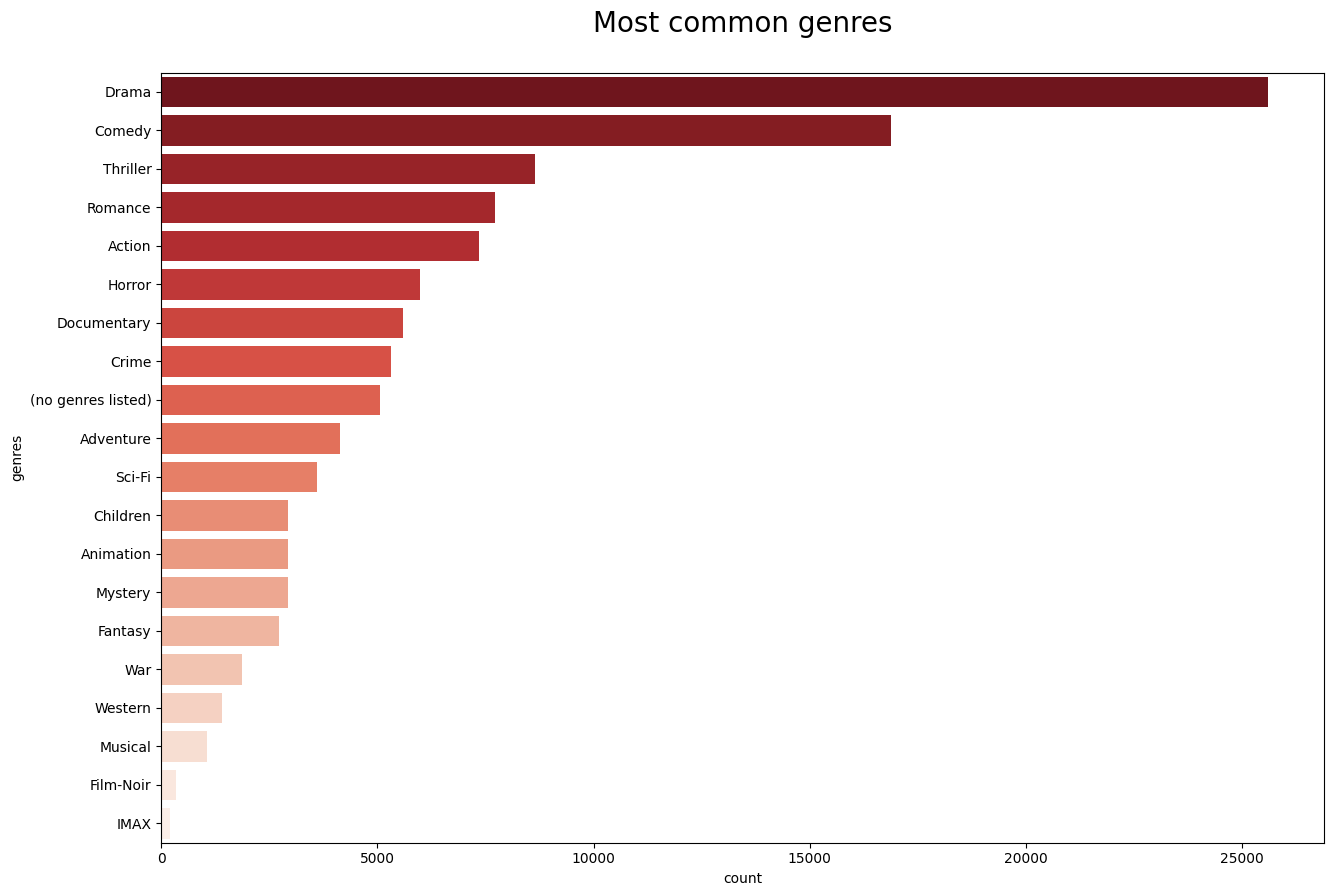

In [17]:
plot = plt.figure(figsize=(15, 10))
plt.title('Most common genres\n', fontsize=20)
sns.countplot(y="genres", data=movies_genres,
              order=movies_genres['genres'].value_counts(ascending=False).index,
              palette='Reds_r')
plt.show()

## Modelling phase
 You only need to apply one version
be it Content based or Collabrative method



In [18]:
import pandas as pd
from surprise import Reader, Dataset, SVD, accuracy
from surprise.model_selection import train_test_split

# Sample books data
books_data = {
    'bookId': [1, 2, 3, 4, 5, 6, 7],
    'title': ['To Kill a Mockingbird', '1984', 'The Great Gatsby', 'Pride and Prejudice', 'The Catcher in the Rye', 'Animal farm'
              ,'Harry Potter']
}

# Create the books DataFrame
books = pd.DataFrame(books_data)

# Sample user profiles
user_profiles = {
    1: {'bookId': [2, 3, 4], 'rating': [5, 4, 3]},
    2: {'bookId': [1, 3, 5], 'rating': [4, 5, 3]}
}

# Combine user profiles into a single DataFrame
all_ratings = []

for user_id, profile in user_profiles.items():
    for book_id, rating in zip(profile['bookId'], profile['rating']):
        all_ratings.append({'userId': user_id, 'bookId': book_id, 'rating': rating})

ratings_df = pd.DataFrame(all_ratings)

# Define the Reader and Dataset
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(ratings_df[['userId', 'bookId', 'rating']], reader)


## Lets Build and Evaluate Our Model

In [19]:
# Split the data into training and test sets
trainset, testset = train_test_split(data, test_size=0.2, )

# Train the SVD model
svd = SVD()
svd.fit(trainset)

# Make predictions on the test set
predictions = svd.test(testset)

# Compute and print the RMSE
rmse = accuracy.rmse(predictions)
print(f"RMSE: {rmse}")

pred = pd.DataFrame(predictions)
pred

RMSE: 0.9264
RMSE: 0.926420073266736


,uid,iid,r_ui,est,details
0,2,1,4.0,3.767703,{'was_impossible': False}
1,1,2,5.0,3.710602,{'was_impossible': False}


## Recommendation Function

In [20]:
# Function to get collaborative recommendations for a user profile
def get_collaborative_recommendations(user_id, svd, books, ratings_df, n=10):
    recommendations = []
    book_ids = books['bookId'].unique()

    for book_id in book_ids:
        prediction = svd.predict(user_id, book_id)
        actual_rating = ratings_df[(ratings_df['userId'] == user_id) & (ratings_df['bookId'] == book_id)]['rating']
        actual_rating = actual_rating.values[0] if not actual_rating.empty else None
        recommendations.append((books[books['bookId'] == book_id]['title'].values[0], prediction.est, actual_rating))

    recommendations = sorted(recommendations, key=lambda x: x[1], reverse=True)

    return recommendations[:n]

# Generate recommendations for each user profile and collect them in a list
all_recommendations = []

for user_id in user_profiles.keys():
    recommendations = get_collaborative_recommendations(user_id, svd, books, ratings_df)
    for title, predicted_rating, actual_rating in recommendations:
        all_recommendations.append({
            'userId': user_id,
            'Recommended Book': title,
            'Predicted_Rating': predicted_rating,
            'Actual Rating': actual_rating
        })

# Convert the list of recommendations to a DataFrame
recommendations_df = pd.DataFrame(all_recommendations)

recommendations_df

,userId,Recommended Book,Predicted_Rating,Actual Rating
0,1,The Great Gatsby,3.890178,4.0
1,1,To Kill a Mockingbird,3.710602,NaN
2,1,1984,3.710602,5.0
3,1,Animal farm,3.710602,NaN
4,1,Harry Potter,3.710602,NaN
5,1,The Catcher in the Rye,3.525364,NaN
6,1,Pride and Prejudice,3.455532,3.0
7,2,The Great Gatsby,4.282375,5.0
8,2,To Kill a Mockingbird,3.767703,4.0
9,2,1984,3.767703,NaN


# Generate your outputs here

Prepare Submission File
We make submissions in CSV files. Your submissions usually have two columns: an ID column and a prediction column. The ID field comes from the test data (keeping whatever name the ID field had in that data, which for the data is the string 'Id'). The prediction column will use the name of the target field.

We will create a DataFrame with this data, and then use the dataframe's to_csv method to write our submission file. Explicitly include the argument index=False to prevent pandas from adding another column in our csv file.

In [21]:
# This is an example
my_submission = pd.DataFrame({'id': recommendations_df.userId,'predict': recommendations_df.Predicted_Rating})
#you could use any filename. We choose submission here
my_submission.to_csv('submission.csv', index=False)

# Tips
- NB:Read the description well
    - REMEMBER: Concatenated ID
    - Evatualtion metrics
- Sampling is your friend -> start small and scale up
- Data ingestioon, pleasse ensure the correct path is dependant on the environment
- Ensure test output matches dimension of test set for Kaggle submission
- 20 Submissions per day
- This is individual project
- Ensure email correlates to Athena for effective tracking
- If you use a shuffler ensure test output aligns with test sample ordering
  - (from sklearn.utils import shuffle), for randomness
- Make sure your notebook is in the same folder
- Analyse your data well
- Make sure you have gone through your content


##Read & understand the Dataset


In [1]:
import pandas as pd

train_df = pd.read_csv(r'C:\Users\chris\Downloads\UNSUPERVISED LEARNING\KAGGLE COMPETITION\alx-movie-recommendation-project-2024\train.csv')
movies_df = pd.read_csv(r'C:\Users\chris\Downloads\UNSUPERVISED LEARNING\KAGGLE COMPETITION\alx-movie-recommendation-project-2024\movies.csv')
imdb_df = pd.read_csv(r'C:\Users\chris\Downloads\UNSUPERVISED LEARNING\KAGGLE COMPETITION\alx-movie-recommendation-project-2024\imdb_data.csv')
test_df = pd.read_csv(r'C:\Users\chris\Downloads\UNSUPERVISED LEARNING\KAGGLE COMPETITION\alx-movie-recommendation-project-2024\test.csv')
links_df = pd.read_csv(r'C:\Users\chris\Downloads\UNSUPERVISED LEARNING\KAGGLE COMPETITION\alx-movie-recommendation-project-2024\links.csv')
tags_df = pd.read_csv(r'C:\Users\chris\Downloads\UNSUPERVISED LEARNING\KAGGLE COMPETITION\alx-movie-recommendation-project-2024\tags.csv')
genome_scores_df = pd.read_csv(r'C:\Users\chris\Downloads\UNSUPERVISED LEARNING\KAGGLE COMPETITION\alx-movie-recommendation-project-2024\genome_scores.csv')
genome_tags_df = pd.read_csv(r'C:\Users\chris\Downloads\UNSUPERVISED LEARNING\KAGGLE COMPETITION\alx-movie-recommendation-project-2024\genome_tags.csv')
sample_submissions_df = pd.read_csv(r'C:\Users\chris\Downloads\UNSUPERVISED LEARNING\KAGGLE COMPETITION\alx-movie-recommendation-project-2024\sample_submission.csv')

# Display the first few rows of each dataframe to understand their structure
print(train_df.head())
print(movies_df.head())
print(imdb_df.head())
print(test_df.head())
print(links_df.head())
print(tags_df.head())
print(genome_scores_df.head())
print(genome_tags_df.head())
print(sample_submissions_df.head())


   userId  movieId  rating   timestamp
0    5163    57669     4.0  1518349992
1  106343        5     4.5  1206238739
2  146790     5459     5.0  1076215539
3  106362    32296     2.0  1423042565
4    9041      366     3.0   833375837
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
   movieId                                         title_cast  \
0        1  Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...   
1        2  Robin Williams|Jonathan Hyde|

##Build a Recommendation Model

In [2]:
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy

# Prepare data for Surprise library
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(train_df[['userId', 'movieId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=0.2)

# Train SVD model
algo = SVD()
algo.fit(trainset)

# Evaluate the model
predictions = algo.test(testset)
rmse = accuracy.rmse(predictions)
print(f'RMSE: {rmse}')


RMSE: 0.8346
RMSE: 0.8345712452365801


#Generate Predictions

In [3]:
# Create predictions for the test set
test_df['rating'] = test_df.apply(lambda x: algo.predict(x['userId'], x['movieId']).est, axis=1)

# Format the Id column as specified
test_df['Id'] = test_df['userId'].astype(str) + '_' + test_df['movieId'].astype(str)

# Select only the required columns
submission_df = test_df[['Id', 'rating']]


##Prepare the Submission File

In [4]:
submission_df.to_csv('submission.csv', index=False)


Submit the File Using Kaggle API

In [6]:
pip install kaggle


     ---------------------------------------- 0.0/82.1 kB ? eta -:--:--
     --------- ---------------------------- 20.5/82.1 kB 320.0 kB/s eta 0:00:01
     -------------------------------------  81.9/82.1 kB 919.0 kB/s eta 0:00:01
     -------------------------------------- 82.1/82.1 kB 764.4 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/78.2 kB ? eta -:--:--
   ---------------------------------------- 78.2/78.2 kB 4.5 MB/s eta 0:00:00
  Created wheel for kaggle: filename=kaggle-1.6.14-py3-none-any.whl size=105130 sha256=931c4045265e69219f644865a88dd64bd58d0571e09bce3236d9dfc5bdf6dff9
  Stored in directory: c:\users\chris\appdata\local\pip\cache\wheels\89\bc\52\0d140fc172783e1e72e3af4dfc13015dc154527fafb95e65cd
Successfully built kaggle
Note: you may need to restart the kernel to use updated packages.
